In [2]:
import time, json, requests
url = 'https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5&callback=&_=%d'%int(time.time()*1000)
data = json.loads(requests.get(url=url).json()['data'])

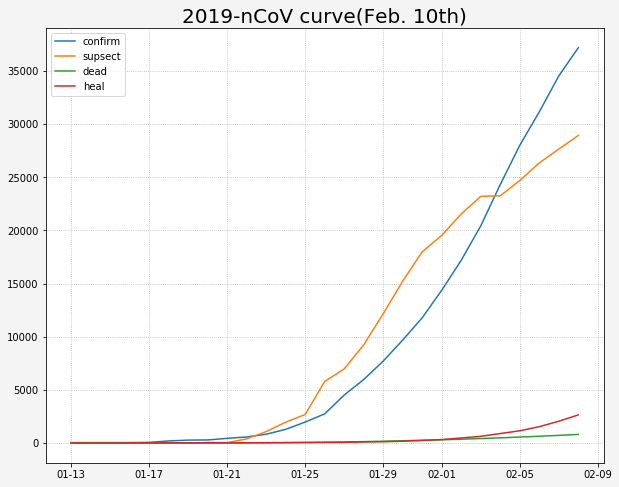

In [3]:
import time
import json
import requests
from datetime import datetime
import numpy as np
import matplotlib
import matplotlib.figure
from matplotlib.font_manager import FontProperties
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

def catch_daily():
    url = 'https://view.inews.qq.com/g2/getOnsInfo?name=wuwei_ww_cn_day_counts&callback=&_=%d'%int(time.time()*1000)
    data = json.loads(requests.get(url=url).json()['data'])
    data.sort(key=lambda x:x['date'])
    
    date_list = list() 
    confirm_list = list() 
    suspect_list = list() 
    dead_list = list() 
    heal_list = list() 
    for item in data:
        month, day = item['date'].split('/')
        date_list.append(datetime.strptime('2020-%s-%s'%(month, day), '%Y-%m-%d'))
        confirm_list.append(int(item['confirm']))
        suspect_list.append(int(item['suspect']))
        dead_list.append(int(item['dead']))
        heal_list.append(int(item['heal']))
    
    return date_list, confirm_list, suspect_list, dead_list, heal_list

def catch_distribution():
    
    
    data = {}
    url = 'https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5&callback=&_=%d'%int(time.time()*1000)
    for item in json.loads(requests.get(url=url).json()['data'])['areaTree'][0]['children']:
        if item['name'] not in data:
            data.update({item['name']:0})
        for city_data in item['children']:
            data[item['name']] += int(city_data['total']['confirm'])
    
    return data

def plot_daily():
    
    
    date_list, confirm_list, suspect_list, dead_list, heal_list = catch_daily() 
    plt.figure('2019-nCoV distribution(Feb. 10th)', facecolor='#f4f4f4', figsize=(10, 8))
    plt.title('2019-nCoV curve(Feb. 10th)', fontsize=20)
    
    plt.plot(date_list, confirm_list, label='confirm')
    plt.plot(date_list, suspect_list, label='supsect')
    plt.plot(date_list, dead_list, label='dead')
    plt.plot(date_list, heal_list, label='heal')
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
    plt.grid(linestyle=':')
    plt.legend(loc='best') 
    plt.savefig('2019-nCoV curve(Feb. 10th).png')
    plt.show()

def plot_distribution():
    
    data = catch_distribution()
    
    font_14 = FontProperties(fname='res/simsun.ttf', size=14)
    font_11 = FontProperties(fname='res/simsun.ttf', size=11)
    
    width = 1600
    height = 800
    rect = [0.1, 0.12, 0.8, 0.8]
    lat_min = 0
    lat_max = 60
    lon_min = 77
    lon_max = 140
  
    
    handles = [
            matplotlib.patches.Patch(color='#ffaa85', alpha=1, linewidth=0),
            matplotlib.patches.Patch(color='#ff7b69', alpha=1, linewidth=0),
            matplotlib.patches.Patch(color='#bf2121', alpha=1, linewidth=0),
            matplotlib.patches.Patch(color='#7f1818', alpha=1, linewidth=0),
]
    labels = [ '1-9', '10-99', '100-999', '>1000']
    
    provincePos = {
        "Liaoning":[121.7,40.9],
        "Jilin":[124.5,43.5],
        "Heilongjiang":[125.6,46.5],
        "Beijing":[116.0,39.9],
        "Tianjin":[117.0,38.7],
        "Neimonggu":[110.0,41.5],
        "Ningxia":[105.2,37.0],
        "Shanxi":[111.0,37.0],
        "Hebei":[114.0,37.8],
        "Shandong":[116.5,36.0],
        "Henan":[111.8,33.5],
        "Shanxi":[107.5,33.5],
        "Hubei":[111.0,30.5],
        "Jiangsu":[119.2,32.5],
        "An'Hui":[115.5,31.8],
        "Shanghai":[121.0,31.0],
        "Hunan":[110.3,27.0],
        "Jiangxi":[114.0,27.0],
        "Zhejiang":[118.8,28.5],
        "Fujian":[116.2,25.5],
        "Guangdong":[113.2,23.1],
        "Taiwan":[120.5,23.5],
        "Hainan":[108.0,19.0],
        "Guangxi":[107.3,23.0],
        "Chongqing":[106.5,29.5],
        "Yunnan":[101.0,24.0],
        "Guizhou":[106.0,26.5],
        "Sichuan":[102.0,30.5],
        "Gansu":[103.0,35.0],
        "Qinghai":[95.0,35.0],
        "Xinjiang":[85.5,42.5],
        "Tibat":[85.0,31.5],
        "Hong Kong":[115.1,21.2],
        "Macao":[112.5,21.2]
    }
    
    fig = matplotlib.figure.Figure()
    fig.set_size_inches(width/100, height/100) 
    axes = fig.add_axes(rect)
    
    # 兰博托投影模式，局部
    #m = Basemap(projection='lcc', llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, lat_1=33, lat_2=45, lon_0=100, ax=axes)
    
    # 兰博托投影模式，全图
    m = Basemap(projection='lcc', llcrnrlon=80, llcrnrlat=0, urcrnrlon=140, urcrnrlat=51, lat_1=33, lat_2=45, lon_0=100, ax=axes)
    
    # 圆柱投影模式，局部
    #m = Basemap(llcrnrlon=lon_min, urcrnrlon=lon_max, llcrnrlat=lat_min, urcrnrlat=lat_max, resolution='l', ax=axes)
    
    # 正射投影模式
    #m = Basemap(projection='ortho', lat_0=36, lon_0=102, resolution='l', ax=axes)
	
	# 全球等经纬投影模式，
    #m = Basemap(llcrnrlon=lon_min, urcrnrlon=lon_max, llcrnrlat=lat_min, urcrnrlat=lat_max, resolution='l', ax=axes)
    #m.etopo()
    m.readshapefile('res/china-shapefiles-master/china', 'province', drawbounds=True)
    m.readshapefile('res/china-shapefiles-master/china_nine_dotted_line', 'section', drawbounds=True)
    m.drawcoastlines(color='black') 
    m.drawcountries(color='black')  
    m.drawparallels(np.arange(lat_min,lat_max,10), labels=[1,0,0,0])
    m.drawmeridians(np.arange(lon_min,lon_max,10), labels=[0,0,0,1])
    pset = set()
    for info, shape in zip(m.province_info, m.province):
        pname = info['OWNER'].strip('\x00')
        fcname = info['FCNAME'].strip('\x00')
        if pname != fcname: 
            continue
        
        for key in data.keys():
            if key in pname:
                if data[key] == 0:
                    color = '#f0f0f0'
                elif data[key] < 10:
                    color = '#ffaa85'
                elif data[key] <100:
                    color = '#ff7b69'
                elif  data[key] < 1000:
                    color = '#bf2121'
                else:
                    color = '#7f1818'
                break
        
        poly = Polygon(shape, facecolor=color, edgecolor=color)
        axes.add_patch(poly)
        
    
    axes.legend(handles, labels, bbox_to_anchor=(0.5, -0.11), loc='lower center', ncol=4, prop=font_14)
    axes.set_title("2019-nCoV distribution", fontproperties=font_14)
    FigureCanvasAgg(fig)
    fig.savefig('2019-nCoV distribution map (Feb. 10th).png')
    

if __name__ == '__main__':
    plot_daily()
    plot_distribution()
    plt.show()


orginal reference: https://blog.csdn.net/xufive/article/details/104093197